### Agglomerative Clustering

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist 

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.cluster import AgglomerativeClustering


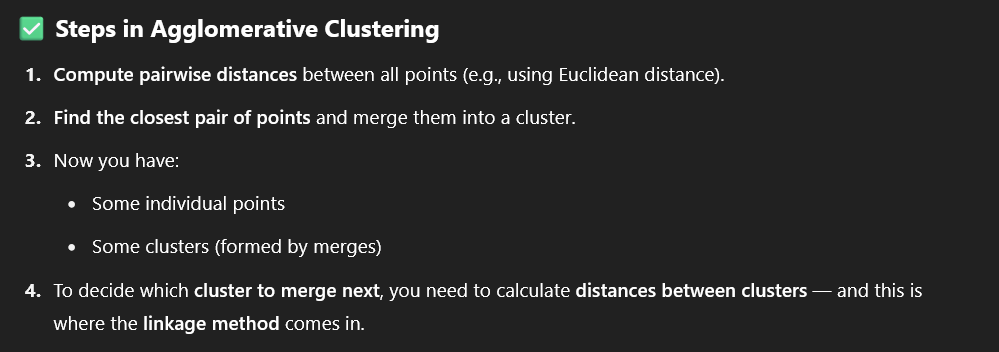

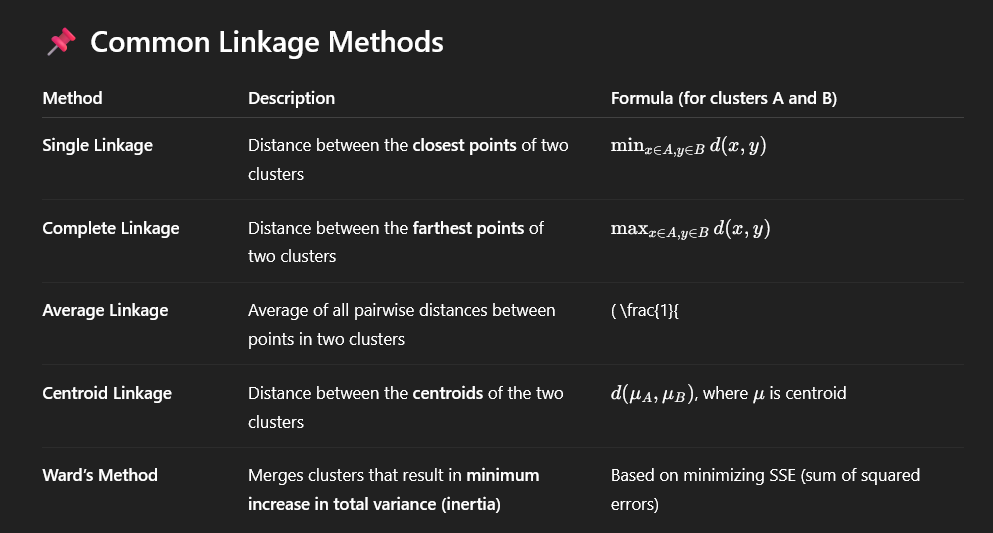

In [4]:
df = pd.read_excel('../customer.xlsx')
df.head(2)

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0


In [7]:
df1 = df.iloc[:, 1:4]
df1.head()

,Yearly_Income,Age,Cust_Spend_Score
0,15000,18,44
1,15000,18,79
2,16000,23,8
3,16000,25,79
4,17000,32,41


In [9]:
df_sc = pd.DataFrame(StandardScaler().fit_transform(df1), columns=df1.columns)
df_sc.head(2)

,Yearly_Income,Age,Cust_Spend_Score
0,-1.738999,-1.501068,-0.284181
1,-1.738999,-1.501068,1.063563


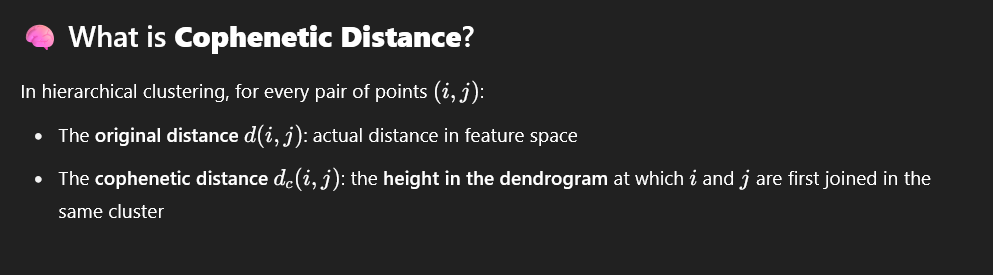

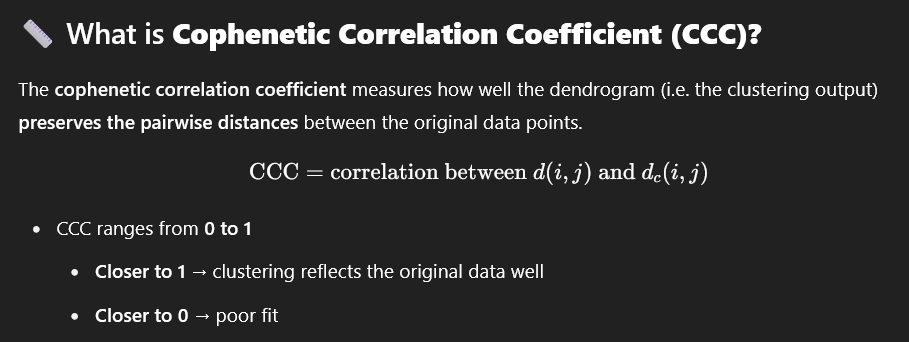

The cophenet of single: 0.4976362567018477


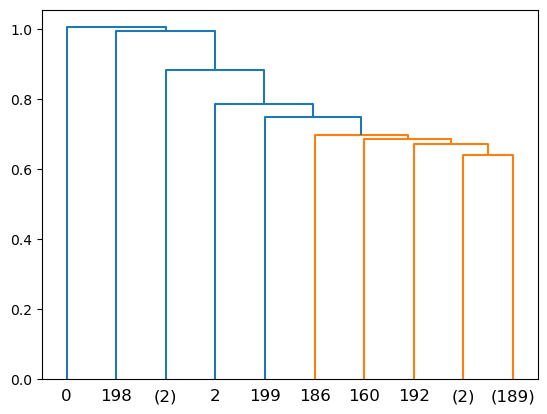

The cophenet of complete: 0.5802671732995099


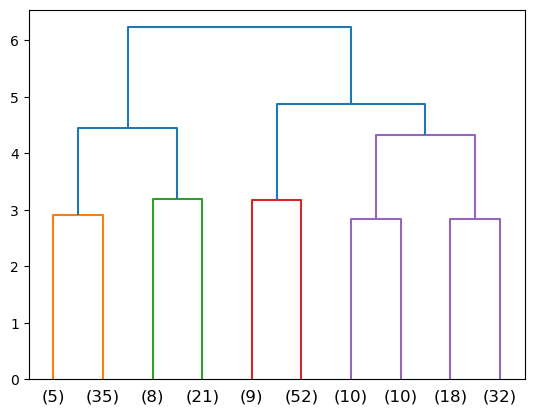

The cophenet of centroid: 0.6471874851072724


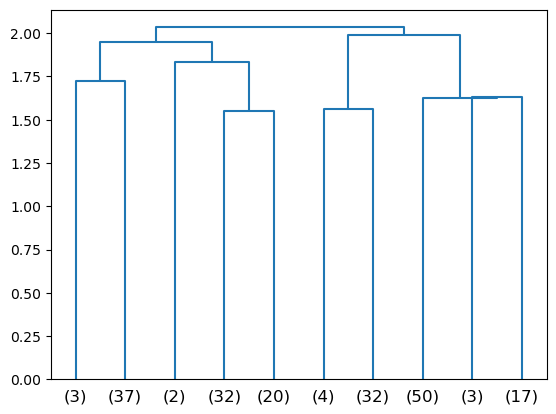

The cophenet of median: 0.6280314484464583


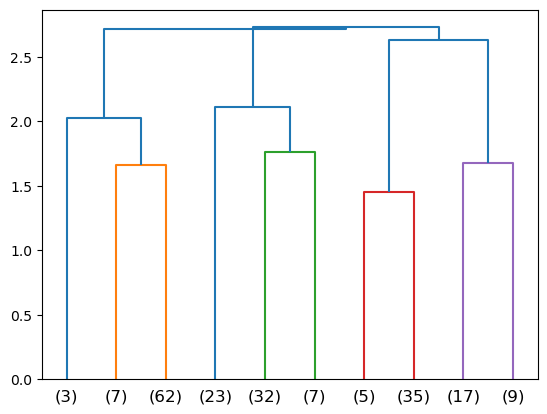

The cophenet of average: 0.6595977493519807


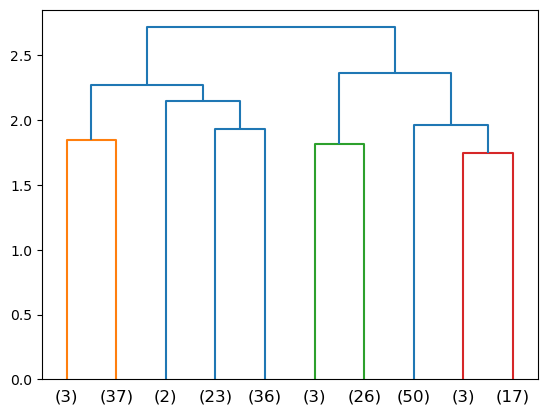

The cophenet of ward: 0.6384840439686307


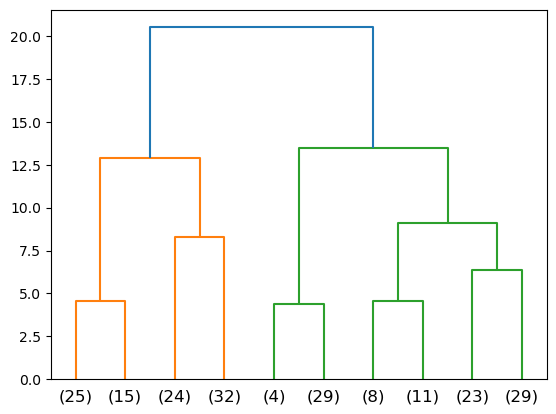

In [11]:
linkage_method = ['single', 'complete', 'centroid', 'median', 'average', 'ward']

for link in linkage_method:
    l = linkage(df_sc, method=link)
    c, dist_matrix = cophenet(l, pdist(df_sc))
    print(f"The cophenet of {link}: {c}") 
    dendrogram(l, truncate_mode="lastp", p=10)
    plt.show()

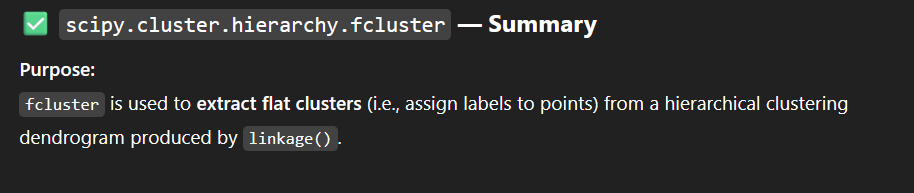



In [ ]:
# t: Threshold (number or distance)
nclust = fcluster(linkage(df_sc, method="complete"), t=4, criterion="max")
np.unique(nclust)

array([1, 2, 3, 4, 5], dtype=int32)

silhouette Score for 2 cluster is 0.33211275941218465


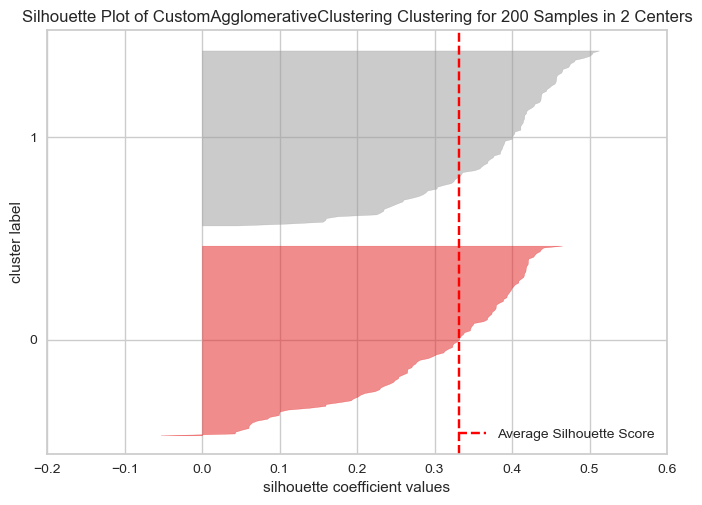

silhouette Score for 3 cluster is 0.3521085268250397


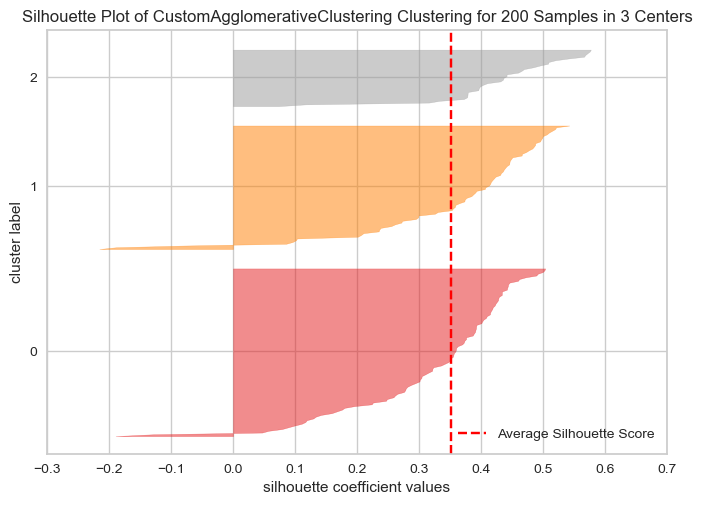

silhouette Score for 4 cluster is 0.3876884326328242


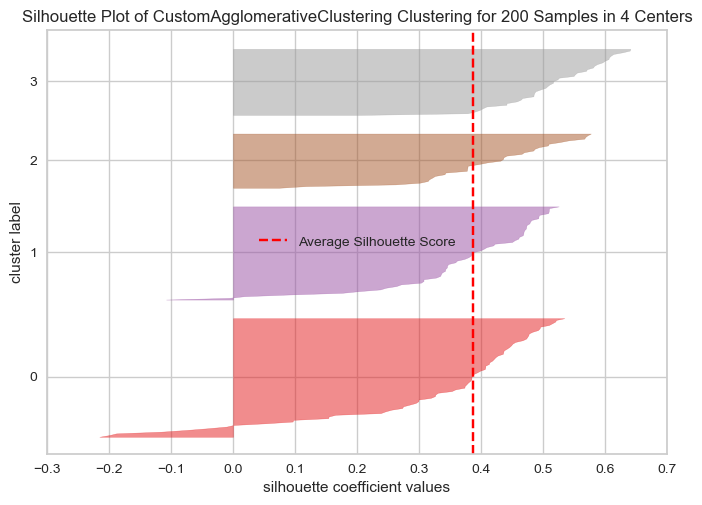

silhouette Score for 5 cluster is 0.4090063627129395


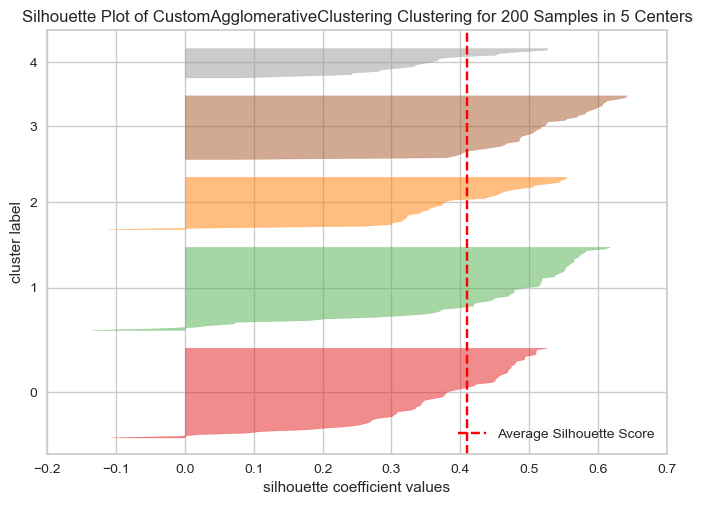

silhouette Score for 6 cluster is 0.4088892773802359


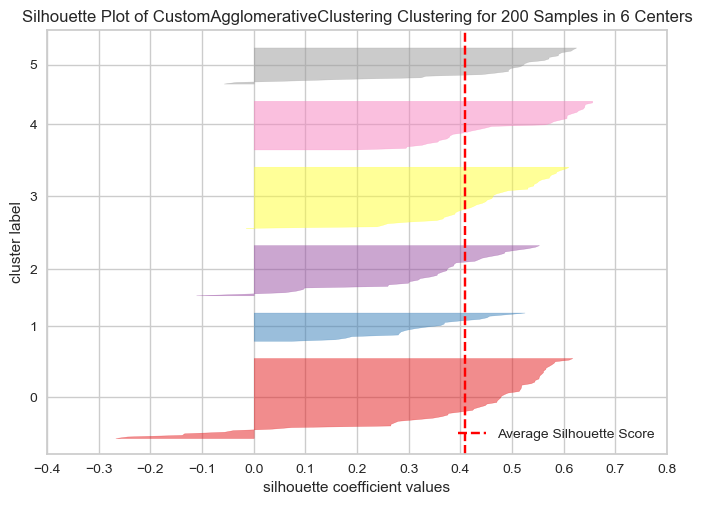

silhouette Score for 7 cluster is 0.39594628585977093


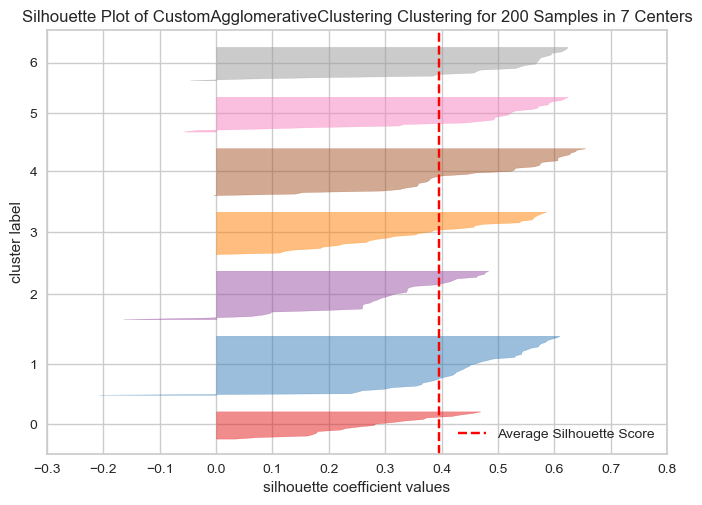

silhouette Score for 8 cluster is 0.4047845086628521


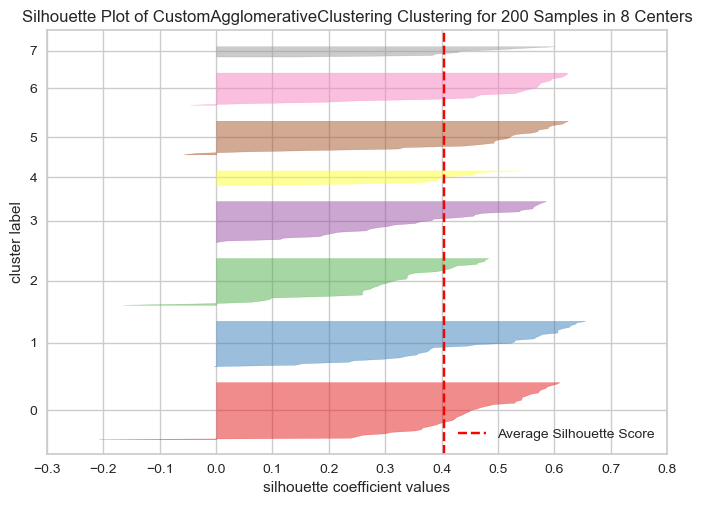

silhouette Score for 9 cluster is 0.3786002114470564


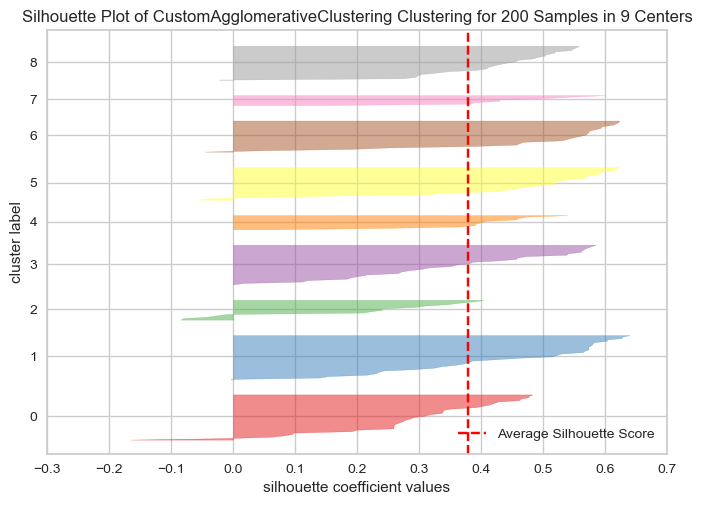

In [ ]:
class CustomAgglomerativeClustering(AgglomerativeClustering):
    def predict(self, *args, **kwargs):
        #super().fit_predict(*args, **kwargs)
        self.fit(*args, **kwargs)
        return self.labels_

for i in range(2, 10):
    agc = CustomAgglomerativeClustering(n_clusters=i, linkage="ward")
    agc.fit(df_sc)
    lable = agc.labels_
    sil_score = silhouette_score(df_sc, lable)
    print(f"silhouette Score for {i} cluster is {sil_score}")
    sv = SilhouetteVisualizer(agc)
    sv.fit(df_sc)
    sv.show()



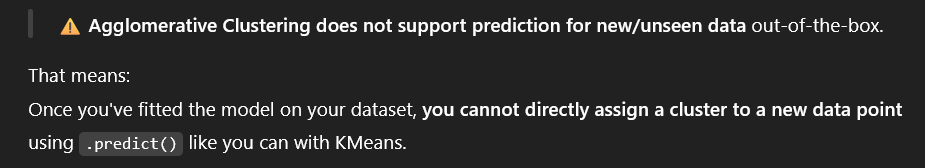

You can turn the unsupervised clusters into pseudo-labels and train a classifier (e.g., KNN, SVM, RF) to predict the cluster for new points.

### DBSCAN

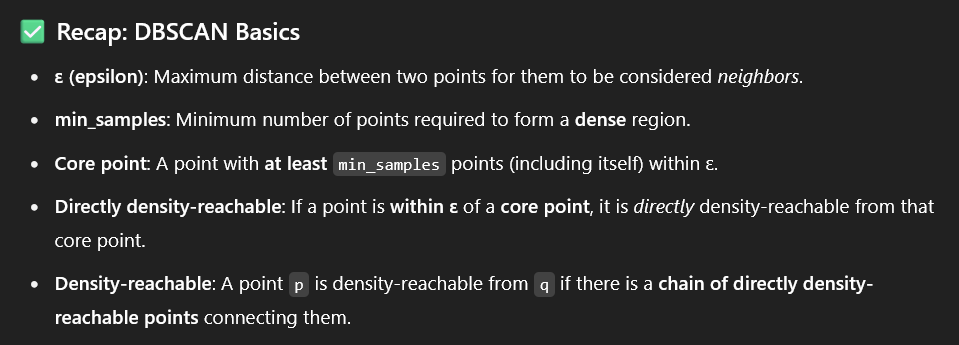
<pre>
🧠 Your Example:

a - b - c - d --- e

    a–b: < ε

    b–c: < ε

    c–d: < ε

    d–e: > ε

If all points a, b, c, d are core points or reachable via core points (i.e., they form a chain of points each within ε of the next), then:

👉 Yes, a–d will be in the same cluster, even though a and d are ~3×ε apart directly.

This is because:

    DBSCAN doesn't require all points in a cluster to be within ε of each other. It only requires a path of direct density-reachability, forming a chain through core points.

🧠 Think of it like this:

    “If a can reach b, and b can reach c, and c can reach d — then a can reach d, even if distance(a, d) > ε.”

🚫 Point e?

    d–e > ε, so e is not directly density-reachable from d.

    If e is not within ε of any core point, and doesn't have enough neighbors to be a core point itself, then:

👉 e is considered noise or a separate cluster, depending on the context.
</pre>


In [26]:
from sklearn.cluster import DBSCAN


In [29]:
db_data = pd.read_csv("../db_data.csv")
db_data.drop(columns="out", inplace=True)
db_data.head(2)


,F1,F2
0,-0.914217,0.206889
1,0.933988,0.018113


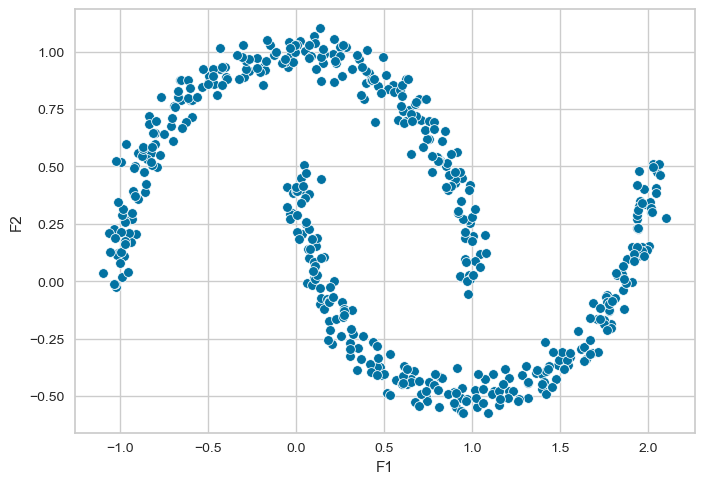

In [31]:
sns.scatterplot(db_data, x="F1", y="F2")
plt.show()

In [40]:
dbs = DBSCAN(eps=0.2, min_samples=10)
dbs.fit(db_data)

DBSCAN(eps=0.2, min_samples=10)

In [41]:
label = dbs.labels_
np.unique(label)

array([0, 1], dtype=int64)

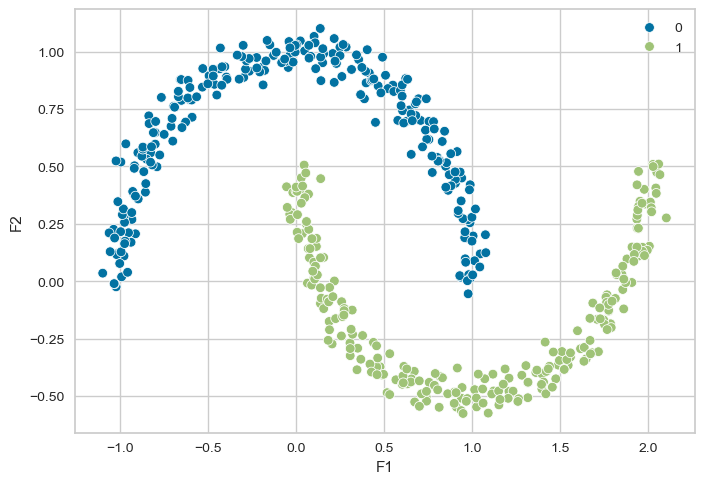

In [42]:
sns.scatterplot(db_data, x="F1", y="F2", hue=label)
plt.show()